In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train.csv')
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [3]:
# 1. 'index' 열 삭제
data = data.drop(columns=['index'])

In [4]:
# 2. 각 변수의 고유값 (unique) 계산
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
    print(f"{col}의 고유값:\n{values}\n")

gender의 고유값:
['F' 'M']

car의 고유값:
['N' 'Y']

reality의 고유값:
['N' 'Y']

child_num의 고유값:
[ 0  1  2  3  4  5 14 19  7]

income_total의 고유값:
[ 202500.   247500.   450000.   157500.   270000.   315000.   180000.
  103500.   193500.   135000.   216000.   225000.   405000.   112500.
  121500.   585000.    90900.    99000.    67500.   292500.    90000.
  495000.    54000.   306000.   130500.   144000.   360000.    40500.
   81000.   351000.   184500.    45000.    79650.   153000.   126000.
  382500.   283500.   175500.   297000.   387000.   337500.   256500.
   72000.   540000.   155250.   189000.   139500.   459000.   720000.
  252000.   171000.   427500.    78750.    94500.   562500.   238500.
  630000.    76500.   301500.   229500.   148500.   166500.   463500.
  432000.   117000.   787500.   234000.   108000.   279000.   900000.
  378000.    31500.    29250.   211500.   207000.    49500.    65250.
  265500.   261000.   162000.   310500.   373500.   140850.   123750.
  191250.    58500.   198

In [5]:
# 3. 'FLAG_MOBIL'열 삭제
data = data.drop(columns=['FLAG_MOBIL'])

In [6]:
import matplotlib.font_manager as fm


plt.rc('font', family='NanumGothic')

# DAYS_EMPLOYED 값 확인, 양수인 값들을 0으로 변경
positive_count = (data['DAYS_EMPLOYED'] > 0).sum()
negative_count = (data['DAYS_EMPLOYED'] <= 0).sum()

print(f"양수 값 개수: {positive_count}")
print(f"음수 값 개수: {negative_count}")

data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

양수 값 개수: 4438
음수 값 개수: 22019


In [7]:
zero_count = (data['DAYS_EMPLOYED'] == 0).sum()
print(f"DAYS_EMPLOYED가 0인 행의 개수: {zero_count}")

DAYS_EMPLOYED가 0인 행의 개수: 4438


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     18286 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [9]:
data.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [10]:
credit_occyp_ratio = data.groupby('credit')['occyp_type'].value_counts(normalize=True).unstack() * 100
credit_occyp_ratio = credit_occyp_ratio.fillna(0).round(0).astype(int)  # NaN을 0으로 대체하고 정수로 변환

# 결과 확인
credit_occyp_ratio

occyp_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
credit,,,,,,,,,,,,,,,,,,
0.0,5,2,3,15,8,0,5,0,26,1,12,4,2,0,13,0,2,0
1.0,5,2,3,14,8,0,6,0,25,0,11,4,1,0,15,1,2,1
2.0,5,2,2,14,9,0,6,0,24,1,12,5,1,0,14,0,3,1


In [11]:
data = data.drop('occyp_type', axis=1)

In [12]:
data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,-2198.529538,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,2370.140530,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

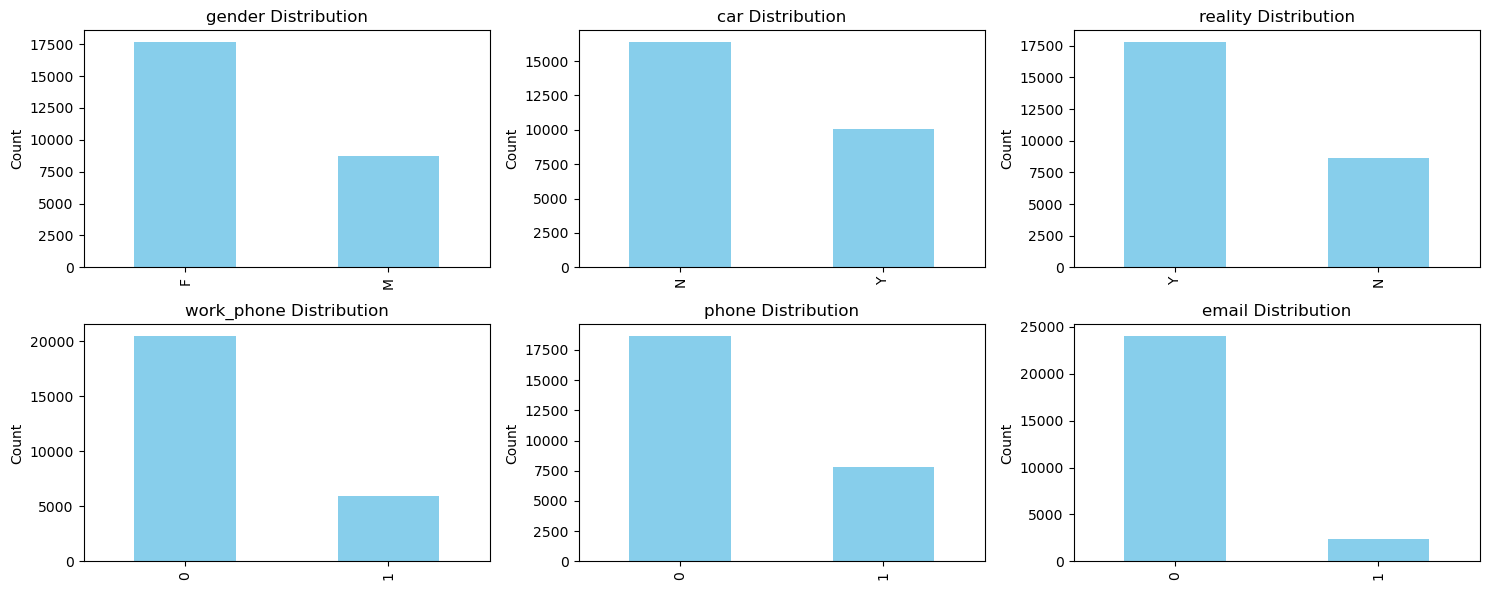

In [13]:
# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)

columns = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']

for ax, col in zip(axes.flat, columns):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# 빈 subplot 숨기기
for i in range(len(columns), len(axes.flat)):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

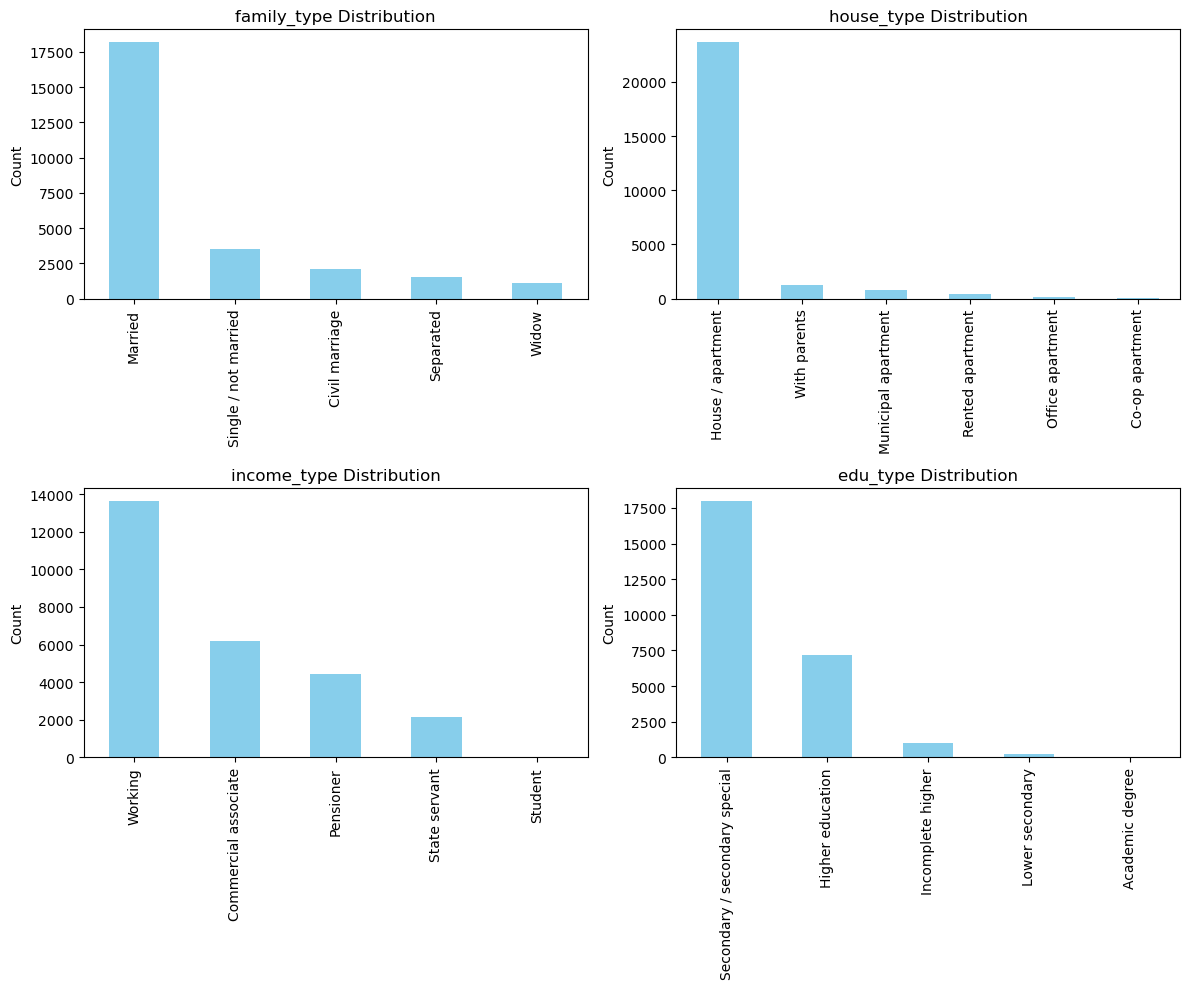

In [14]:
# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['family_type', 'house_type', 'income_type', 'edu_type']

for ax, col in zip(axes.flat, columns):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# 빈 subplot 숨기기
for i in range(len(columns), len(axes.flat)):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

In [15]:
data['credit'].value_counts()

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

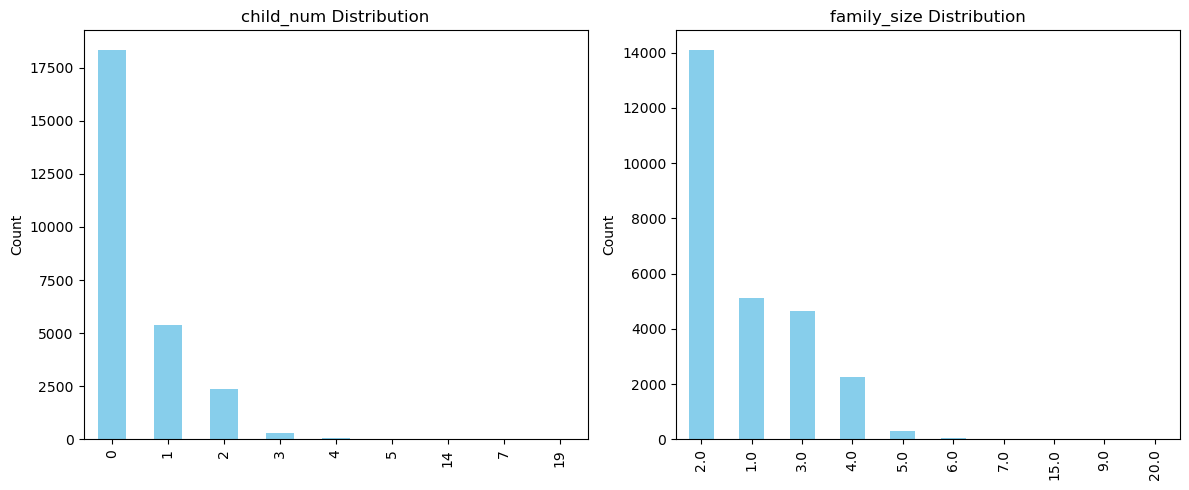

In [16]:
# 그래프 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

columns = ['child_num', 'family_size']

for ax, col in zip(axes, columns):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
# 'child_num' 열의 고유값과 각 고유값의 개수 확인
child_num_counts = data['child_num'].value_counts()
child_num_counts

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: count, dtype: int64

In [18]:
# 'family_size' 열의 고유값과 각 고유값의 개수 확인
child_num_counts = data['family_size'].value_counts()
child_num_counts

family_size
2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: count, dtype: int64

In [19]:
# 'child_num'과 'family_size'의 상관관계 계산 및 출력
correlation = data[['child_num', 'family_size']].corr()
correlation

,child_num,family_size
child_num,1.00000,0.89053
family_size,0.89053,1.00000


### family size 버리고 child_num 5 이상 값은 5라고 하고 child_num 변수 쓰기

In [20]:
data = data.drop('family_size', axis=1)
data['child_num'] = data['child_num'].apply(lambda x: 5 if x >= 5 else x)

1. gender(F/M) int64로 바꾸기 -----> F : 0 , M : 1  

2. car(N/Y) int64로 바꾸기 -----> N : 0 , Y : 1  

3. reality(N/Y) int64로 바꾸기 -----> N : 0 , Y : 1  

4. 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month' 값 +로 바꾸기  

5. float64 -> int64로 바꾸기  

In [21]:
# 1. 'gender' 컬럼 F:0, M:1 변환
data['gender'] = data['gender'].map({'F': 0, 'M': 1}).astype('int64')

# 2. 'car' 컬럼 N:0, Y:1 변환
data['car'] = data['car'].map({'N': 0, 'Y': 1}).astype('int64')

# 3. 'reality' 컬럼 N:0, Y:1 변환
data['reality'] = data['reality'].map({'N': 0, 'Y': 1}).astype('int64')

# 4. 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'의 값 절대값으로 변환
data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']] = data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].abs()

# 5. float64 -> int64로 변환
data = data.astype({col: 'int64' for col in data.select_dtypes('float64').columns})

# 결과 확인
data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit
0,0,0,0,0,202500,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,6,1
1,0,0,1,1,247500,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,5,1
2,1,1,1,0,450000,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,22,2
3,0,0,1,0,202500,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,37,0
4,0,1,1,0,157500,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,2,1
26453,0,0,1,1,180000,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,47,2
26454,0,1,0,0,292500,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,25,2
26455,1,0,1,0,171000,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,59,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         26457 non-null  int64 
 1   car            26457 non-null  int64 
 2   reality        26457 non-null  int64 
 3   child_num      26457 non-null  int64 
 4   income_total   26457 non-null  int64 
 5   income_type    26457 non-null  object
 6   edu_type       26457 non-null  object
 7   family_type    26457 non-null  object
 8   house_type     26457 non-null  object
 9   DAYS_BIRTH     26457 non-null  int64 
 10  DAYS_EMPLOYED  26457 non-null  int64 
 11  work_phone     26457 non-null  int64 
 12  phone          26457 non-null  int64 
 13  email          26457 non-null  int64 
 14  begin_month    26457 non-null  int64 
 15  credit         26457 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 3.2+ MB


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

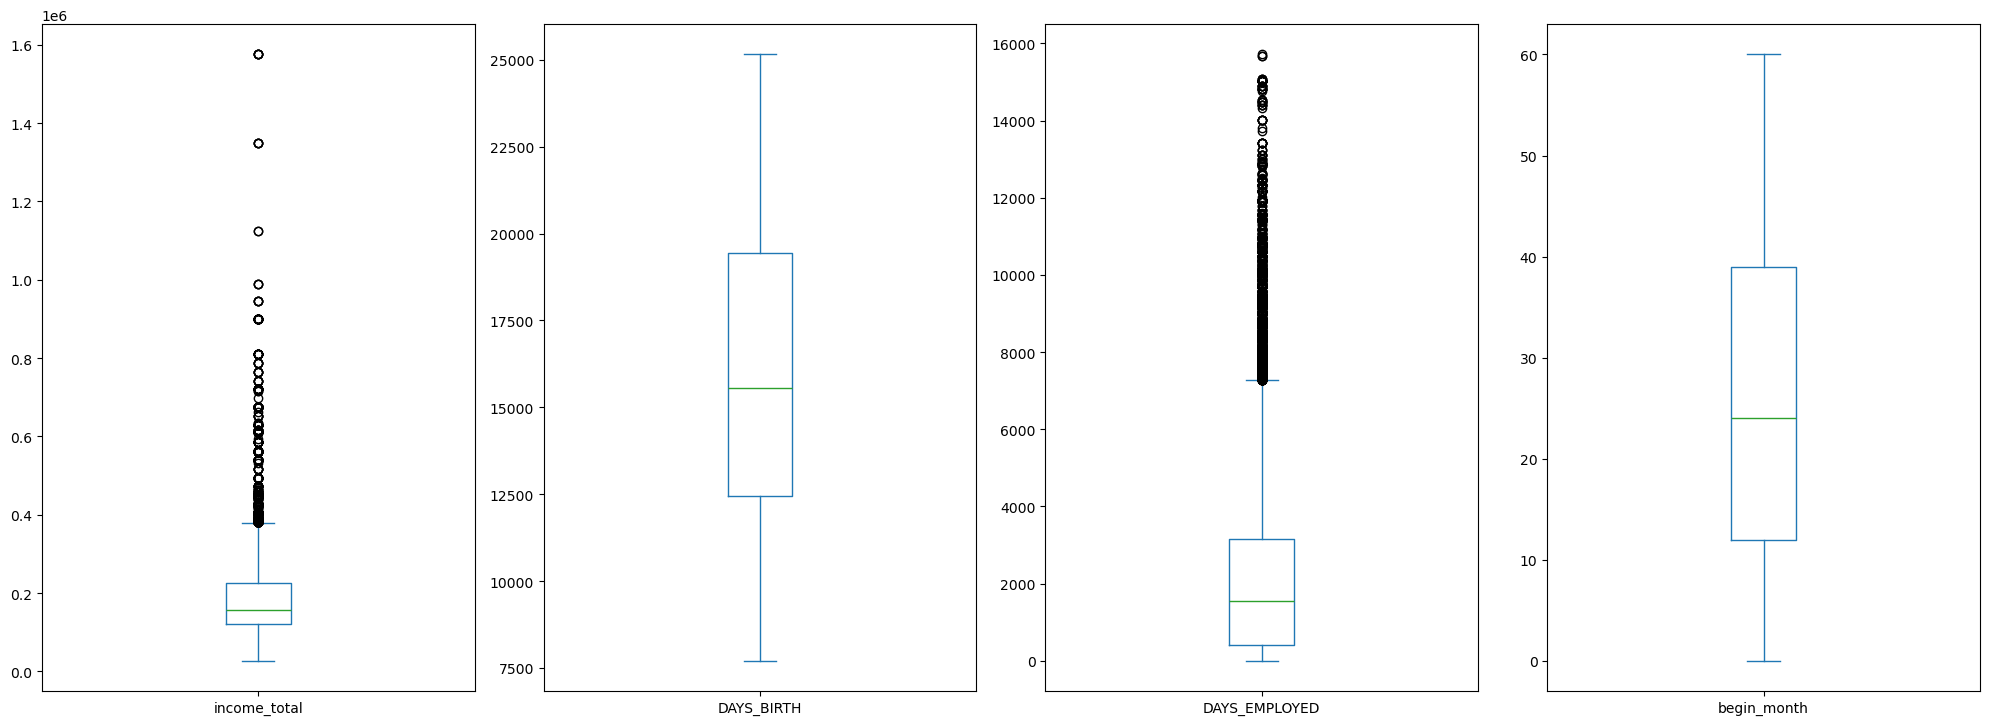

In [23]:
# 박스플롯을 한 그림 안에 표시
data[['income_total','DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].plot(kind='box', subplots=True, layout=(1, 4), figsize=(20, 8), sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### object 변수 고윳값  
### income_type (소득유형)
'Commercial associate': 상업 관련 직종에서 일하는 사람들.  
'Working': 일반 근로자.  
'State servant': 공무원.  
'Pensioner': 연금 수령자.  
'Student': 학생.  

### edu_type (교육수준)
Higher education': 고등 교육을 받은 경우 (대학, 전문대 등).  
'Secondary / secondary special': 중등 교육 혹은 중등 특별 교육 이수.  
'Incomplete higher': 대학 교육을 완료하지 못한 경우.  
'Lower secondary': 중학교 이하의 교육 이수.  
'Academic degree': 학위 소지자 (석사, 박사 등).  

### family_type (가족형태)
'Married': 결혼한 상태.  
'Civil marriage': 법적 결혼은 아니지만 동거 중인 상태.  
'Separated': 이혼은 아니지만 별거 중인 상태.  
'Single / not married': 미혼 상태.  
'Widow': 배우자를 잃은 경우.  

### house_type (주거형태)
'Municipal apartment': 지방 자치 단체에서 제공하는 임대 아파트.  
'House / apartment': 개인 소유의 집이나 아파트.  
'With parents': 부모와 함께 거주하는 경우.  
'Co-op apartment': 협동조합 형태의 아파트.  
'Rented apartment': 임대한 아파트.  
'Office apartment': 사무실로 사용되는 아파트.

## 라벨인코딩

In [24]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

encoding_mappings = {}
for column in ['income_type', 'edu_type', 'family_type', 'house_type']:
    data[column] = label_encoder.fit_transform(data[column])
    encoding_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# 결과 확인
encoding_mappings

{'income_type': {'Commercial associate': 0,
  'Pensioner': 1,
  'State servant': 2,
  'Student': 3,
  'Working': 4},
 'edu_type': {'Academic degree': 0,
  'Higher education': 1,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Secondary / secondary special': 4},
 'family_type': {'Civil marriage': 0,
  'Married': 1,
  'Separated': 2,
  'Single / not married': 3,
  'Widow': 4},
 'house_type': {'Co-op apartment': 0,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'Office apartment': 3,
  'Rented apartment': 4,
  'With parents': 5}}

In [ ]:
# data.to_csv('./data/label.csv', index=False)  # 라벨인코딩

In [25]:
data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit
0,0,0,0,0,202500,0,1,1,2,13899,4709,0,0,0,6,1
1,0,0,1,1,247500,0,4,0,1,11380,1540,0,0,1,5,1
2,1,1,1,0,450000,4,1,1,1,19087,4434,0,1,0,22,2
3,0,0,1,0,202500,0,4,1,1,15088,2092,0,1,0,37,0
4,0,1,1,0,157500,2,1,1,1,15037,2105,0,0,0,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000,2,4,1,1,12079,1984,0,0,0,2,1
26453,0,0,1,1,180000,4,1,2,1,15291,2475,0,0,0,47,2
26454,0,1,0,0,292500,4,4,0,5,10082,2015,0,0,0,25,2
26455,1,0,1,0,171000,4,2,3,1,10145,107,0,0,0,59,2


## 원핫인코딩

In [28]:
encoded_data = pd.get_dummies(data, columns=['income_type', 'edu_type', 'family_type', 'house_type'])
# encoded_data.to_csv('./data/one-hot.csv', index=False)
data2 = pd.read_csv('./data/one-hot.csv')
data2

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,family_type_1,family_type_2,family_type_3,family_type_4,house_type_0,house_type_1,house_type_2,house_type_3,house_type_4,house_type_5
0,0,0,0,0,202500,13899,4709,0,0,0,...,True,False,False,False,False,False,True,False,False,False
1,0,0,1,1,247500,11380,1540,0,0,1,...,False,False,False,False,False,True,False,False,False,False
2,1,1,1,0,450000,19087,4434,0,1,0,...,True,False,False,False,False,True,False,False,False,False
3,0,0,1,0,202500,15088,2092,0,1,0,...,True,False,False,False,False,True,False,False,False,False
4,0,1,1,0,157500,15037,2105,0,0,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000,12079,1984,0,0,0,...,True,False,False,False,False,True,False,False,False,False
26453,0,0,1,1,180000,15291,2475,0,0,0,...,False,True,False,False,False,True,False,False,False,False
26454,0,1,0,0,292500,10082,2015,0,0,0,...,False,False,False,False,False,False,False,False,False,True
26455,1,0,1,0,171000,10145,107,0,0,0,...,False,False,True,False,False,True,False,False,False,False


### 카이제곱 검정(독립변수가 범주형 변수일때만)  
3개 이상 범주형 독립 변수 원핫인코딩 해야함. 종속변수는 굳이 원핫인코딩 안 해도 됨

In [29]:
from scipy.stats import chi2_contingency
import pandas as pd

# 이진 범주형 변수와 다중 범주형 변수 목록
binary_vars = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']
multi_category_vars = ['income_type', 'edu_type', 'family_type', 'house_type']
continuous_vars = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
target_var = ['credit']

# 다중 범주형 변수에 대해 원-핫 인코딩 수행
data_encoded = pd.get_dummies(data, columns=multi_category_vars)

# 결과를 저장할 리스트 생성
chi2_results = []

# 이진 변수에 대해 카이제곱 검정 수행
for var in binary_vars:
    contingency_table = pd.crosstab(data_encoded[var], data_encoded['credit'])
    chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)
    if p_val <= 0.05:  # 유의미한 변수만 저장
        chi2_results.append({
            'Variable': var,
            'Chi2 Statistic': chi2_stat,
            'p-value': round(p_val, 4),
            'Degrees of Freedom': dof
        })

# 다중 범주형 변수에 대해 원-핫 인코딩된 각 범주별로 카이제곱 검정 수행
for var in multi_category_vars:
    encoded_cols = [col for col in data_encoded.columns if col.startswith(var)]
    for col in encoded_cols:
        contingency_table = pd.crosstab(data_encoded[col], data_encoded['credit'])
        chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)
        if p_val <= 0.05:  # 유의미한 변수만 저장
            chi2_results.append({
                'Variable': col,
                'Chi2 Statistic': chi2_stat,
                'p-value': round(p_val, 4),
                'Degrees of Freedom': dof
            })

# 유의미한 변수들에 대한 카이제곱 검정 결과를 데이터프레임으로 변환
chi2_results_df = pd.DataFrame(chi2_results)

# 최종 데이터프레임 생성: 유의미한 변수와 연속형 변수 결합
final_vars = chi2_results_df['Variable'].tolist() + continuous_vars + target_var
final_data = data_encoded[final_vars]

# 카이제곱 검정 결과와 최종 데이터프레임 출력
print("Chi-Square Test Results:")
chi2_results_df

Chi-Square Test Results:


,Variable,Chi2 Statistic,p-value,Degrees of Freedom
0,car,9.396436,0.0091,2
1,reality,11.231612,0.0036,2
2,phone,8.035167,0.0180,2
3,email,6.065864,0.0482,2
4,income_type_0,18.326786,0.0001,2
5,income_type_4,11.070212,0.0039,2
6,edu_type_1,7.017194,0.0299,2
7,family_type_0,9.901679,0.0071,2
8,family_type_1,29.757092,0.0000,2
9,family_type_3,22.936887,0.0000,2


In [30]:
print("\nFiltered DataFrame:")
final_data


Filtered DataFrame:


,car,reality,phone,email,income_type_0,income_type_4,edu_type_1,family_type_0,family_type_1,family_type_3,family_type_4,house_type_2,house_type_4,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,credit
0,0,0,0,0,True,False,True,False,True,False,False,True,False,0,202500,13899,4709,6,1
1,0,1,0,1,True,False,False,True,False,False,False,False,False,1,247500,11380,1540,5,1
2,1,1,1,0,False,True,True,False,True,False,False,False,False,0,450000,19087,4434,22,2
3,0,1,1,0,True,False,False,False,True,False,False,False,False,0,202500,15088,2092,37,0
4,1,1,0,0,False,False,True,False,True,False,False,False,False,0,157500,15037,2105,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,0,False,False,False,False,True,False,False,False,False,2,225000,12079,1984,2,1
26453,0,1,0,0,False,True,True,False,False,False,False,False,False,1,180000,15291,2475,47,2
26454,1,0,0,0,False,True,False,True,False,False,False,False,False,0,292500,10082,2015,25,2
26455,0,1,0,0,False,True,False,False,False,True,False,False,False,0,171000,10145,107,59,2


<이진> 
'gender', 
'car', 
'reality', 
'work_phone', 
'phone', 
'email'

<연속형> 
'income_total', 
'DAYS_BIRTH', 
'DAYS_EMPLOYED', 
'begin_month', 
'child_num', 

<범주형>
'income_type', 
'edu_type', 
'family_type', 
'house_type'

<타겟변수>
'credit'

<버리는 변수>
'index', 
'FLAG_MOBIL', 
'occyp_type',
'family_size'

# 모델학습

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./data/label.csv')  # 라벨인코딩
data2 = pd.read_csv('./data/one-hot.csv')  # 원핫인코딩

## DNN

#### 원핫인코딩 변수 선택

Epoch 1/80


C:\Users\박소현\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


662/662 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6456 - loss: 0.8832 - val_accuracy: 0.6676 - val_loss: 0.8489
Epoch 2/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6775 - loss: 0.8324 - val_accuracy: 0.6727 - val_loss: 0.8367
Epoch 3/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6827 - loss: 0.8203 - val_accuracy: 0.6733 - val_loss: 0.8386
Epoch 4/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6835 - loss: 0.8197 - val_accuracy: 0.6791 - val_loss: 0.8264
Epoch 5/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6846 - loss: 0.8143 - val_accuracy: 0.6788 - val_loss: 0.8320
Epoch 6/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6885 - loss: 0.8063 - val_accuracy: 0.6810 - val_loss: 0.8241
Epoch 7/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6884 - loss: 0.8086 - val_accuracy: 0.6829 - val_loss: 0.8241
Epoch 8/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6841 - loss: 0.8070 - val_accuracy: 0.6818 -

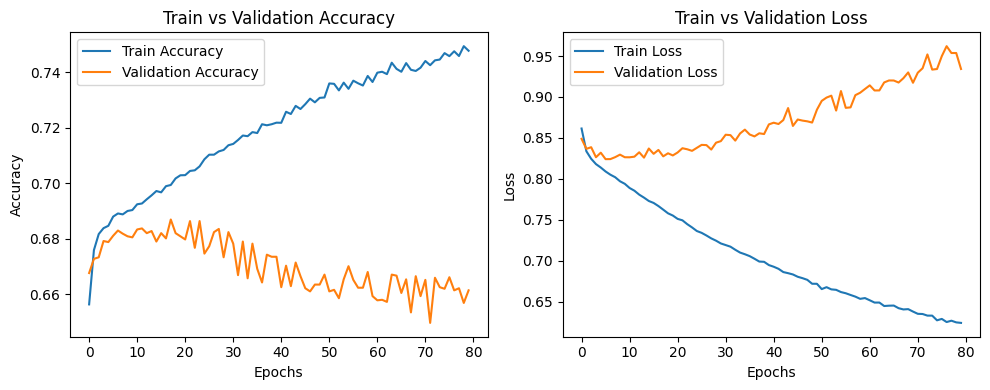

훈련 데이터 정확도: 0.7573
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
검증 데이터 정확도: 0.6614
F1 Score: 0.61403598375651

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.10      0.14       650
           1       0.55      0.30      0.39      1262
           2       0.70      0.91      0.79      3380

    accuracy                           0.66      5292
   macro avg       0.50      0.43      0.44      5292
weighted avg       0.61      0.66      0.61      5292



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# 데이터 준비
X = data2[['car', 'reality', 'phone', 'email', 'income_type_0', 'income_type_4', 'edu_type_1', 'family_type_0', 'family_type_1',
           'family_type_3', 'family_type_4', 'house_type_2', 'house_type_4', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
y = data2['credit']  # 타겟 변수

# 타겟 변수 원-핫 인코딩
y_encoded = to_categorical(y, num_classes=3)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# DNN 모델 생성
dnn_model2 = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3개의 클래스에 대한 확률 출력
])

# 모델 컴파일
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model2.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = dnn_model2.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

# 학습 기록 출력
print(history.history)


# 학습 정확도 및 손실 그래프 그리기
plt.figure(figsize=(10, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터 정확도
train_loss, train_accuracy = dnn_model2.evaluate(X_train, y_train, verbose=0)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측
y_pred_proba = dnn_model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 예측 확률을 클래스 라벨로 변환
y_test_classes = np.argmax(y_test, axis=1)  # 원-핫 인코딩된 타겟을 클래스 라벨로 변환

# 검증 데이터 정확도
test_accuracy = accuracy_score(y_test_classes, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 - F1 스코어 및 분류 보고서
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred))

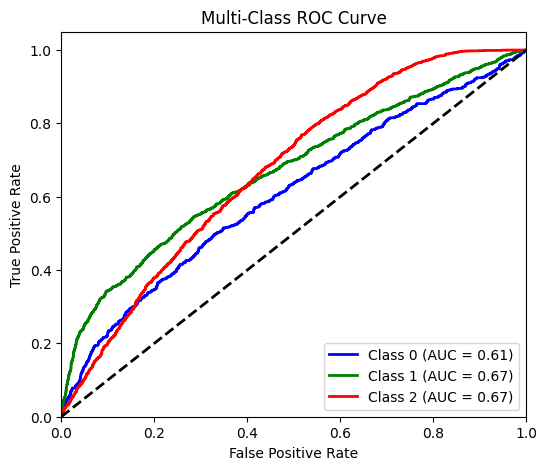

Overall AUC Score: 0.6492


In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")

#### 원핫인코딩 변수 선택 얼리스탑핑

Epoch 1/80


C:\Users\박소현\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6200 - loss: 0.9092 - val_accuracy: 0.6644 - val_loss: 0.8625
Epoch 2/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6717 - loss: 0.8391 - val_accuracy: 0.6810 - val_loss: 0.8391
Epoch 3/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6790 - loss: 0.8259 - val_accuracy: 0.6778 - val_loss: 0.8379
Epoch 4/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6892 - loss: 0.8132 - val_accuracy: 0.6829 - val_loss: 0.8295
Epoch 5/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6842 - loss: 0.8149 - val_accuracy: 0.6850 - val_loss: 0.8234
Epoch 6/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6863 - loss: 0.8073 - val_accuracy: 0.6822 - val_loss: 0.8247
Epoch 7/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6947 - loss: 0.7971 - val_accuracy: 0.6814 - val_loss: 0.8275
Epoch 8/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6907 - loss: 0.8002 - val_accuracy: 0.6850 - val_

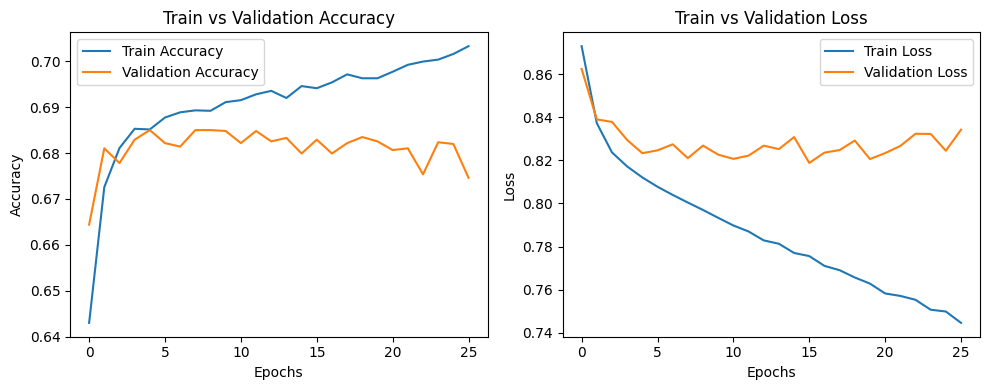

훈련 데이터 정확도: 0.6977
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
검증 데이터 정확도: 0.6829
F1 Score: 0.5956143694732017

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       650
           1       0.69      0.22      0.34      1262
           2       0.68      0.99      0.81      3380

    accuracy                           0.68      5292
   macro avg       0.46      0.40      0.38      5292
weighted avg       0.60      0.68      0.60      5292



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 준비
X = data2[['car', 'reality', 'phone', 'email', 'income_type_0', 'income_type_4', 'edu_type_1', 'family_type_0', 'family_type_1',
           'family_type_3', 'family_type_4', 'house_type_2', 'house_type_4', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
y = data2['credit']  # 타겟 변수

# 타겟 변수 원-핫 인코딩
y_encoded = to_categorical(y, num_classes=3)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 스케일러 학습 및 변환
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# DNN 모델 생성
dnn_model2 = Sequential([Dense(64, input_dim=X.shape[1], activation='relu'),
                         Dense(32, activation='relu'),
                         Dense(32, activation='relu'),
                         Dense(16, activation='relu'),
                         Dense(3, activation='softmax')])# 3개의 클래스에 대한 확률 출력
    
dnn_model2.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 'val_loss'를 모니터링
    patience=10,         # 개선되지 않는 에포크 수 (10 에포크 동안 개선 없으면 종료)
    restore_best_weights=True)  # 최상의 가중치를 복원

# 모델 학습
history = dnn_model2.fit(
    X_train, y_train,
    epochs=80,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping])  # 얼리스탑핑 콜백 추가

# 학습 기록 출력
print(history.history)

# 학습 정확도 및 손실 그래프 그리기
plt.figure(figsize=(10, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터 정확도
train_loss, train_accuracy = dnn_model2.evaluate(X_train, y_train, verbose=0)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측
y_pred_proba = dnn_model2.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 예측 확률을 클래스 라벨로 변환
y_test_classes = np.argmax(y_test, axis=1)  # 원-핫 인코딩된 타겟을 클래스 라벨로 변환

# 검증 데이터 정확도
test_accuracy = accuracy_score(y_test_classes, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 - F1 스코어 및 분류 보고서
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred))

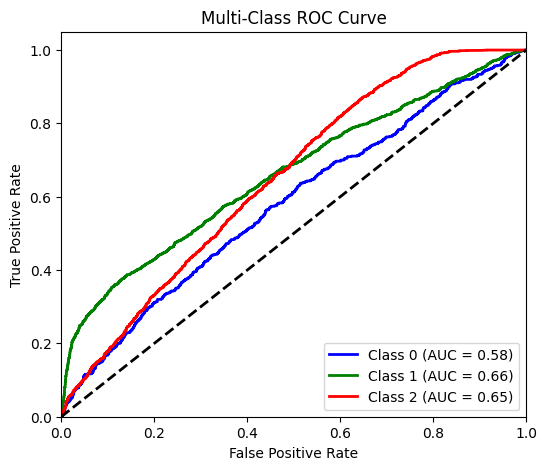

Overall AUC Score: 0.6292


In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")


#### 라벨인코딩 변수 전체

Epoch 1/80


C:\Users\박소현\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6428 - loss: 0.8814 - val_accuracy: 0.6635 - val_loss: 0.8529
Epoch 2/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6679 - loss: 0.8436 - val_accuracy: 0.6619 - val_loss: 0.8498
Epoch 3/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6800 - loss: 0.8296 - val_accuracy: 0.6757 - val_loss: 0.8329
Epoch 4/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6758 - loss: 0.8297 - val_accuracy: 0.6729 - val_loss: 0.8346
Epoch 5/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6870 - loss: 0.8147 - val_accuracy: 0.6803 - val_loss: 0.8322
Epoch 6/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6829 - loss: 0.8203 - val_accuracy: 0.6805 - val_loss: 0.8272
Epoch 7/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6928 - loss: 0.8024 - val_accuracy: 0.6810 - val_loss: 0.8265
Epoch 8/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6960 - loss: 0.7977 - val_accuracy: 0.6805 - val_

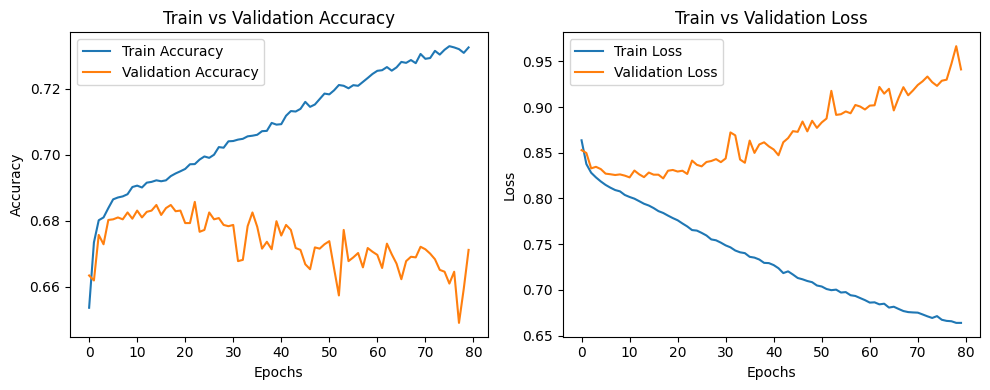

훈련 데이터 정확도: 0.7417
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
검증 데이터 정확도: 0.6712
F1 Score: 0.613681095748198

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.06      0.09       650
           1       0.58      0.30      0.39      1262
           2       0.70      0.93      0.80      3380

    accuracy                           0.67      5292
   macro avg       0.52      0.43      0.43      5292
weighted avg       0.62      0.67      0.61      5292



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# 데이터 준비
X = data.drop(columns=['credit'])  # 독립 변수
y = data['credit']  # 타겟 변수

# 타겟 변수 원-핫 인코딩
y_encoded = to_categorical(y, num_classes=3)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# DNN 모델 생성
dnn_model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3개의 클래스에 대한 확률 출력
])

# 모델 컴파일
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = dnn_model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

# 학습 기록 출력
print(history.history)


# 학습 정확도 및 손실 그래프 그리기
plt.figure(figsize=(10, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터 정확도
train_loss, train_accuracy = dnn_model.evaluate(X_train, y_train, verbose=0)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측
y_pred_proba = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 예측 확률을 클래스 라벨로 변환
y_test_classes = np.argmax(y_test, axis=1)  # 원-핫 인코딩된 타겟을 클래스 라벨로 변환

# 검증 데이터 정확도
test_accuracy = accuracy_score(y_test_classes, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 - F1 스코어 및 분류 보고서
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred))

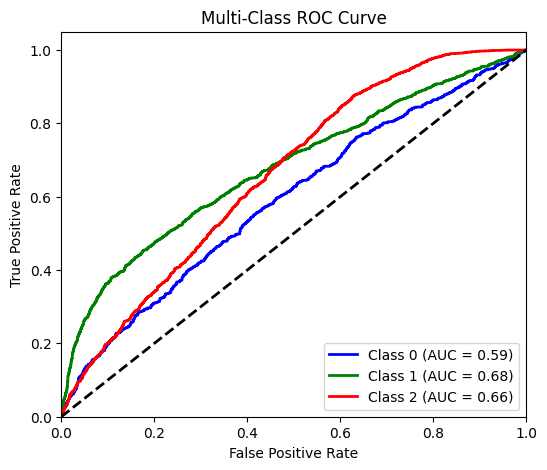

Overall AUC Score: 0.6436


In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")

#### 라벨인코딩 변수 전체 얼리스탑핑

Epoch 1/80


C:\Users\박소현\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


662/662 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6430 - loss: 0.8813 - val_accuracy: 0.6597 - val_loss: 0.8592
Epoch 2/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6730 - loss: 0.8395 - val_accuracy: 0.6657 - val_loss: 0.8479
Epoch 3/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6836 - loss: 0.8208 - val_accuracy: 0.6805 - val_loss: 0.8347
Epoch 4/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6831 - loss: 0.8232 - val_accuracy: 0.6803 - val_loss: 0.8294
Epoch 5/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6896 - loss: 0.8092 - val_accuracy: 0.6799 - val_loss: 0.8393
Epoch 6/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6853 - loss: 0.8098 - val_accuracy: 0.6801 - val_loss: 0.8267
Epoch 7/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6829 - loss: 0.8160 - val_accuracy: 0.6825 - val_loss: 0.8256
Epoch 8/80
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6863 - loss: 0.8091 - val_accuracy: 0.6791 - val_

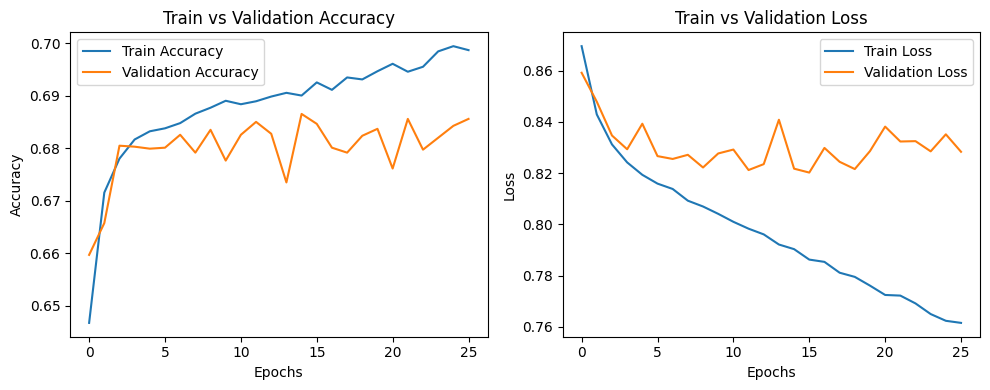

훈련 데이터 정확도: 0.6940
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
검증 데이터 정확도: 0.6846
F1 Score: 0.5996534860511904

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       650
           1       0.67      0.23      0.35      1262
           2       0.69      0.98      0.81      3380

    accuracy                           0.68      5292
   macro avg       0.45      0.41      0.39      5292
weighted avg       0.60      0.68      0.60      5292



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 준비
X = data.drop(columns=['credit'])  # 독립 변수
y = data['credit']  # 타겟 변수

# 타겟 변수 원-핫 인코딩
y_encoded = to_categorical(y, num_classes=3)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# DNN 모델 생성
dnn_model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3개의 클래스에 대한 확률 출력
])

# 모델 컴파일
# dnn_model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 'val_loss'를 모니터링
    patience=10,         # 개선되지 않는 에포크 수 (10 에포크 동안 개선 없으면 종료)
    restore_best_weights=True  # 최상의 가중치를 복원
)

# 모델 학습
history = dnn_model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # 얼리스탑핑 콜백 추가
)

# 학습 기록 출력
print(history.history)

# 학습 정확도 및 손실 그래프 그리기
plt.figure(figsize=(10, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터 정확도
train_loss, train_accuracy = dnn_model.evaluate(X_train, y_train, verbose=0)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측
y_pred_proba = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 예측 확률을 클래스 라벨로 변환
y_test_classes = np.argmax(y_test, axis=1)  # 원-핫 인코딩된 타겟을 클래스 라벨로 변환

# 검증 데이터 정확도
test_accuracy = accuracy_score(y_test_classes, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 - F1 스코어 및 분류 보고서
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred))

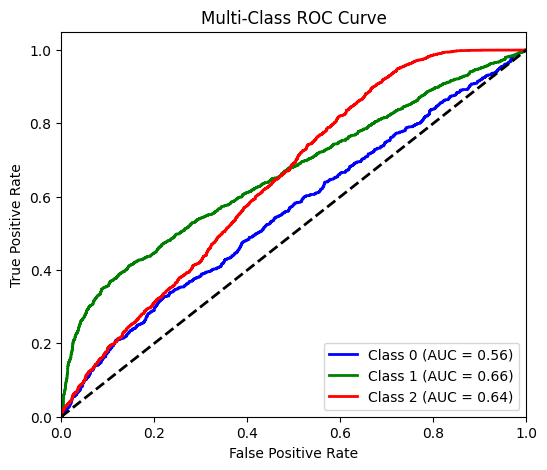

Overall AUC Score: 0.6216


In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")

## XGBoost

원핫인코딩 변수 선택

훈련 데이터 정확도: 0.7774
검증 데이터 정확도: 0.6975
F1 Score: 0.6381432575260152

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.08      0.14       995
           1       0.69      0.31      0.43      1893
           2       0.70      0.96      0.81      5050

    accuracy                           0.70      7938
   macro avg       0.62      0.45      0.46      7938
weighted avg       0.67      0.70      0.64      7938



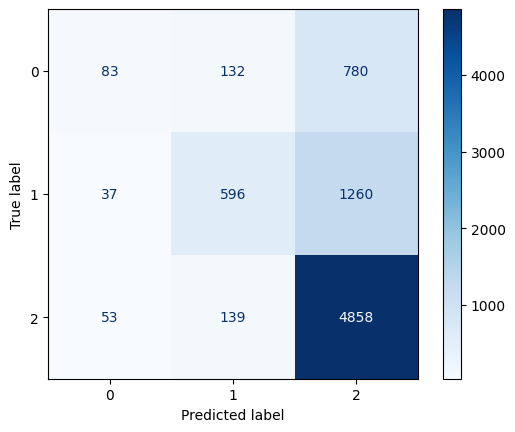

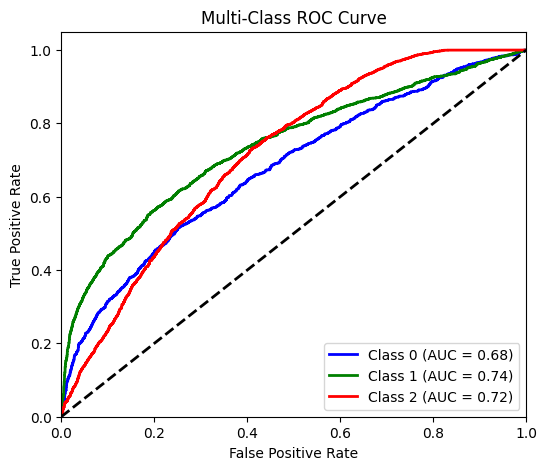

Overall AUC Score: 0.7094


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
X = data2[['car', 'reality', 'phone', 'email', 'income_type_0', 'income_type_4', 'edu_type_1', 'family_type_0', 'family_type_1',
           'family_type_3', 'family_type_4', 'house_type_2', 'house_type_4', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
y = data2['credit']  # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# XGBoost 모델 생성 및 학습
xgb_model2 = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model2.fit(X_train, y_train)

# 훈련 데이터 정확도
train_accuracy = xgb_model2.score(X_train, y_train)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측 및 정확도
y_pred = xgb_model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 결과 출력
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정오행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model2.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

# AUC 및 ROC 곡선 시각화
# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test, classes=xgb_model2.classes_)
n_classes = y_test_binarized.shape[1]

# 예측 확률 계산
y_pred_proba = xgb_model2.predict_proba(X_test)

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {xgb_model2.classes_[i]} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")


라벨인코딩 변수 전체

훈련 데이터 정확도: 0.7841
검증 데이터 정확도: 0.6998
F1 Score: 0.6422695078110547

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.10      0.17       995
           1       0.68      0.32      0.43      1893
           2       0.71      0.96      0.81      5050

    accuracy                           0.70      7938
   macro avg       0.65      0.46      0.47      7938
weighted avg       0.68      0.70      0.64      7938



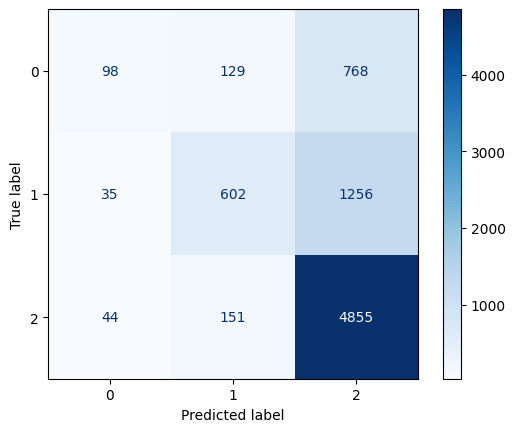

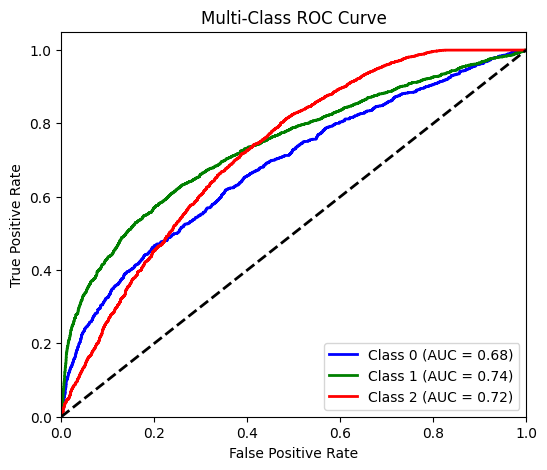

Overall AUC Score: 0.7151


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# 데이터 준비
X = data.drop(columns=['credit'])
y = data['credit']  # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 훈련 데이터 정확도
train_accuracy = xgb_model.score(X_train, y_train)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측 및 정확도
y_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 결과 출력
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정오행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()


# AUC 및 ROC 곡선 시각화
# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test, classes=xgb_model.classes_)
n_classes = y_test_binarized.shape[1]

# 예측 확률 계산
y_pred_proba = xgb_model.predict_proba(X_test)

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {xgb_model.classes_[i]} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")

## Random Forest

원핫인코딩 변수 선택

훈련 데이터 정확도: 0.9805
검증 데이터 정확도: 0.7016
F1 Score: 0.6781254550275672

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.23      0.30       995
           1       0.62      0.46      0.53      1893
           2       0.74      0.88      0.81      5050

    accuracy                           0.70      7938
   macro avg       0.60      0.53      0.55      7938
weighted avg       0.68      0.70      0.68      7938



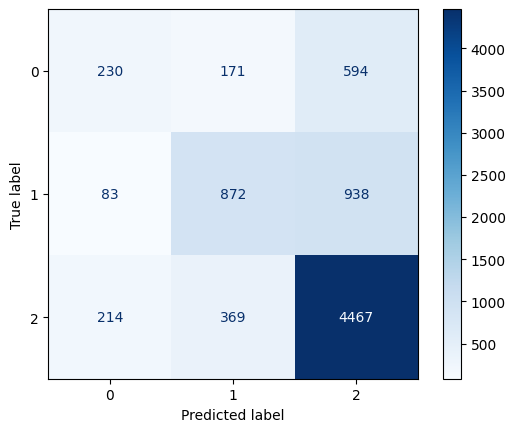

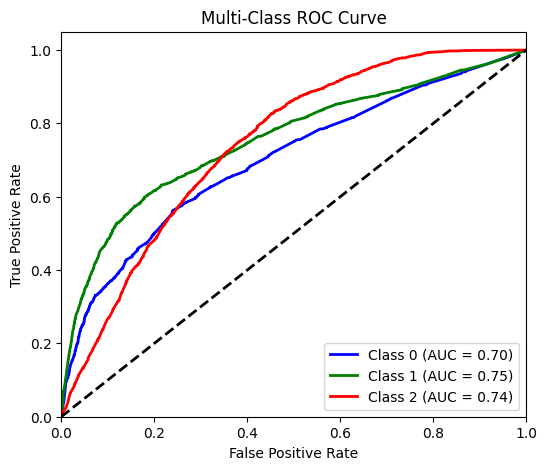

Overall AUC Score: 0.7322


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# 데이터 준비
X = data2[['car', 'reality', 'phone', 'email', 'income_type_0', 'income_type_4', 'edu_type_1', 'family_type_0', 'family_type_1',
           'family_type_3', 'family_type_4', 'house_type_2', 'house_type_4', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
y = data2['credit']  # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# 랜덤 포레스트 모델 생성 및 학습
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train, y_train)

# 훈련 데이터 정확도
train_accuracy = rf_model2.score(X_train, y_train)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측 및 정확도
y_pred = rf_model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 결과 출력
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정오행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model2.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

# AUC 및 ROC 곡선 시각화
# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test, classes=rf_model2.classes_)
n_classes = y_test_binarized.shape[1]

# 예측 확률 계산
y_pred_proba = rf_model2.predict_proba(X_test)

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {rf_model2.classes_[i]} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")

라벨인코딩 변수 전체

훈련 데이터 정확도: 0.9806
검증 데이터 정확도: 0.7024
F1 Score: 0.6815931901251646

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.25      0.32       995
           1       0.61      0.47      0.53      1893
           2       0.75      0.88      0.81      5050

    accuracy                           0.70      7938
   macro avg       0.60      0.53      0.55      7938
weighted avg       0.68      0.70      0.68      7938



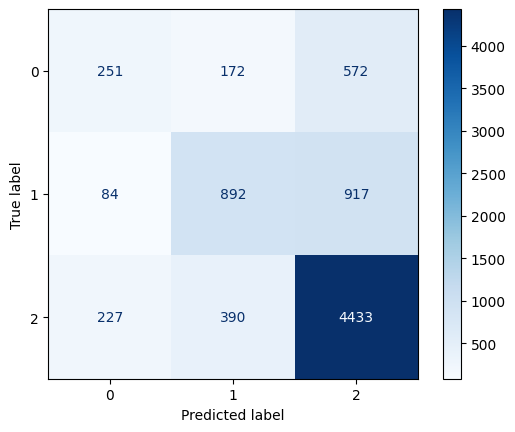

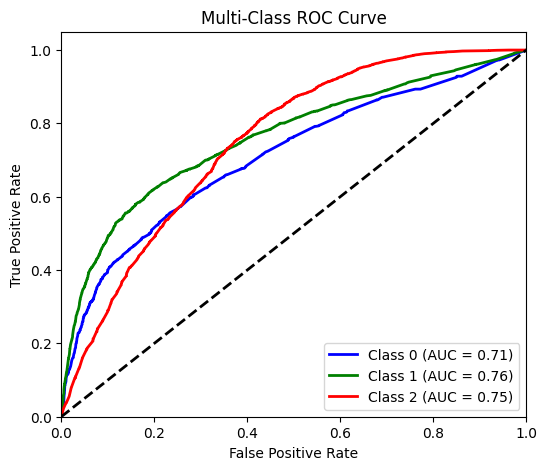

Overall AUC Score: 0.7396


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# 데이터 준비
X = data.drop(columns=['credit'])
y = data['credit']  # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링할 컬럼 지정
columns_to_scale = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'begin_month', 'child_num']

# 스케일러 학습 및 변환
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 훈련 데이터 정확도
train_accuracy = rf_model.score(X_train, y_train)
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")

# 검증 데이터 예측 및 정확도
y_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"검증 데이터 정확도: {test_accuracy:.4f}")

# 평가 결과 출력
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정오행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()


# AUC 및 ROC 곡선 시각화
# 다중 클래스 AUC를 위해 타겟 변수를 이진화
y_test_binarized = label_binarize(y_test, classes=rf_model.classes_)
n_classes = y_test_binarized.shape[1]

# 예측 확률 계산
y_pred_proba = rf_model.predict_proba(X_test)

# ROC 곡선과 AUC를 위한 색상 설정
colors = ['blue', 'green', 'red']
plt.figure(figsize=(6, 5))

# 각 클래스에 대해 ROC 곡선 그리기
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {rf_model.classes_[i]} (AUC = {roc_auc:.2f})')

# 무작위 분류에 대한 대각선 (y=x) 추가
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 그래프 제목, 레이블 및 범례
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 전체 AUC 계산
overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc:.4f}")